# COURSE: Generate and visualize data in Python and MATLAB

## SECTION: Image signals

### https://www.udemy.com/course/suv-data-mxc/?couponCode=201910

### INSTRUCTOR: sincxpress.com


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import hilbert
from scipy import interpolate
from operator import xor

---
# VIDEO: Lines and edges
---


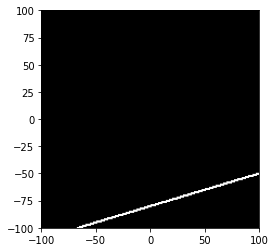

In [2]:
# lines

# line parameters
m = .3  # slope of line
b = -80  # y-offset of line

# drawing parameters
n = 201  # size of box
t = 1  # thickness of line

x = np.arange(n) - np.floor(n / 2)
img = np.zeros((n, n))

for i in range(n):

  # solve the equation for the line at this point
  y = m * x[i] + b

  # skip if out of range
  if abs(y) < max(x):

    # get index for this value
    yidx = np.argmin(np.abs(x - y))

    # expand to desired thickness
    yi = np.arange(max(0, yidx - t), min(n, yidx + t))
    xi = np.arange(max(0, i - t), min(n, i + t))

    # populate matrix column-wise
    for xii in xi:
      img[yi, xii] = 1

# plot
plt.imshow(img,
           cmap=plt.cm.gray,
           origin="lower",
           extent=(x[0], x[-1], x[0], x[-1]))
plt.show()

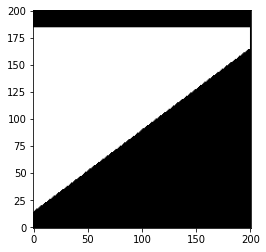

In [3]:
# filled edges

# line parameters
m = .75463  # slope of line
b = 0  # y-offset of line

# drawing parameters
n = 201  # size of box

x = np.arange(0, n) - np.floor(n / 2)
img = np.zeros((n, n))

for i in range(n):

  # solve the equation for the line at this point
  y = m * x[i] + b

  # skip if out of range
  if abs(y) < max(x):

    # get index for this value
    yidx = np.argmin(np.abs(x - y))

    yi = np.arange(max(0, yidx - 10), min(n, yidx + 10))

    # populate matrix
    for ii in range(i):
      img[yi, ii] = 1

# plot
plt.imshow(img, cmap=plt.cm.gray, origin="lower")
plt.show()

---
# VIDEO: Sine patches and Gabor patches
---


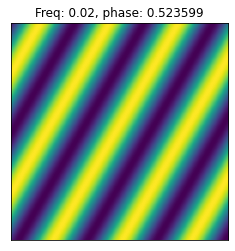

In [4]:
## sine patches

# sine frequency
sinefreq = .02  # arbitrary units

# sine phases
sinephas = np.pi / 6  # rotate
sinephi = 2  # shift

# sine wave initializations
lims = [-91, 91]
[x, y] = np.meshgrid(range(lims[0], lims[1]), range(lims[0], lims[1]))
xp = x * np.cos(sinephas) + y * np.sin(sinephas)

# compute sine wave
img = np.sin(2 * np.pi * sinefreq * xp + sinephi)

# plot
plt.imshow(img)
plt.title('Freq: %g, phase: %g' % (sinefreq, sinephas))
plt.xticks([]), plt.yticks([])
plt.show()

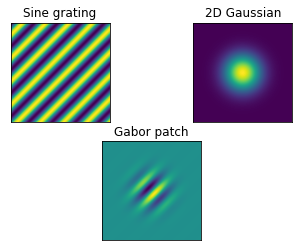

In [5]:
## Gabor patches

# sine frequency
sinefreq = .015  # arbitrary units

# sine phase
sinephas = np.pi / 4

# width of gaussian (a.u.)
width = 50

n = 200

# sine wave initializations
[x, y] = np.meshgrid(range(-n, n), range(-n, n))
xp = x * np.cos(sinephas) + y * np.sin(sinephas)

# compute sine wave
sine2d = np.sin(2 * np.pi * sinefreq * xp)

# create Gaussian
gaus2d = np.exp(-(x**2 + y**2) / (2 * width**2))

# # point-wise multiply the image and Gaussian
img = np.multiply(sine2d, gaus2d)

# plot the sine patch
plt.subplot2grid((2, 2), (0, 0))
plt.imshow(sine2d)
plt.xticks([]), plt.yticks([])
plt.title('Sine grating')

# plot the Gaussian
plt.subplot2grid((2, 2), (0, 1))
plt.imshow(gaus2d)
plt.xticks([]), plt.yticks([])
plt.title('2D Gaussian')

# plot the Gabor patch
plt.subplot2grid((2, 1), (1, 0))
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('Gabor patch')

plt.show()

---
# VIDEO: Geometric shapes
---


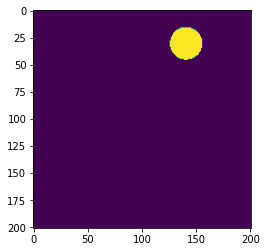

In [6]:
## circles by radius

# radius of circle (pixels)
radius = 15

# center coordinate (fraction of width,height)
cent = [.7, .15]

# define grid relative to center point
n = 201
[X, Y] = np.meshgrid(range(n), range(n))

# distance from origin
dist = np.sqrt((X - np.dot(cent[0], n))**2 + (Y - np.dot(cent[1], n))**2)

# create zeros matrix and keep pixels inside the radius
img = np.zeros((n, n))

for i in range(n):
  for j in range(n):
    if dist[i, j] < radius:
      img[i, j] = 1

# plot
plt.imshow(img)
plt.show()

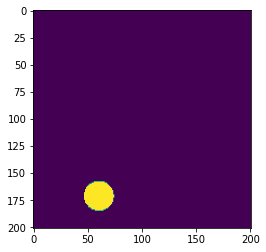

In [7]:
## circles by Gaussian thresholding

# width of gaussian (a.u.)
width = 30

# center coordinate (fraction of width,height)
cent = [.3, .85]

# define grid relative to center point
n = 201
[X, Y
 ] = np.meshgrid(range(n) - np.dot(cent[0], n),
                 range(n) - np.dot(cent[1], n))

# create Gaussian
gaus2d = np.exp(-(X**2 + Y**2) / (2 * width**2))

# threshold the image at high values in the Gaussian
img = np.zeros((n, n))

for i in range(n):
  for j in range(n):
    if gaus2d[i, j] > .9:
      img[i, j] = 1

# plot
plt.imshow(img)
plt.show()

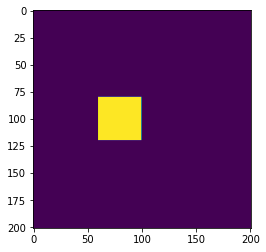

In [8]:
## Rectangle

# center of rectangle (fraction of width,height)
cent = [.5, .4]

# size of rectangle (fraction of width,height)
rsize = [.2, .2]

# initialize empty image
n = 201
img = np.zeros((n, n))

# define x- and y-values to toggle
xvals = np.arange(max(0, int(n * (cent[0] - rsize[0] / 2))),
                  int(n * (cent[0] + rsize[0] / 2)))
yvals = np.arange(max(0, int(n * (cent[1] - rsize[1] / 2))),
                  int(n * (cent[1] + rsize[1] / 2)))

# flip the switch
for i in range(len(xvals)):
  for j in range(len(yvals)):
    img[xvals[i], yvals[j]] = 1

# plot
plt.imshow(img)
plt.show()

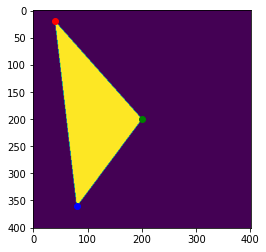

In [9]:
## Triangle

# size of image grid (width and height)
n = 401

# locations (fractional distance: LEFT TOP)
A = np.round(np.dot([.1, .05], n))
B = np.round(np.dot([.5, .5], n))
C = np.round(np.dot([.2, .9], n))

# compute triangle area
Aabc = abs(A[0] * B[1] + B[0] * C[1] + C[0] * A[1] - A[0] * C[1] -
           C[0] * B[1] - B[0] * A[1]) / 2

# create blank image
[X, Y] = np.meshgrid(range(0, n), range(0, n))

# use sub-areas test to label each point as being inside or outside triangle
Aabp = abs(
    np.dot(X, A[1] - B[1]) + np.dot(Y, B[0] - A[0]) + A[0] * B[1] -
    B[0] * A[1]) / 2
Aacp = abs(
    np.dot(X, A[1] - C[1]) + np.dot(Y, C[0] - A[0]) + A[0] * C[1] -
    C[0] * A[1]) / 2
Abcp = abs(
    np.dot(X, B[1] - C[1]) + np.dot(Y, C[0] - B[0]) + B[0] * C[1] -
    C[0] * B[1]) / 2

# now threshold image (the "1-" inverts the colors)
img = np.zeros((n, n))
for i in range(0, n):
  for j in range(0, n):
    if (Aabp[i, j] + Aacp[i, j] + Abcp[i, j]) - Aabc < 1:
      img[i, j] = 1

plt.imshow(img)

# # and draw the edges on top for references
plt.plot(A[0], A[1], 'ro')  # A
plt.plot(B[0], B[1], 'go')  # B
plt.plot(C[0], C[1], 'bo')  # C
plt.show()

---
# VIDEO: Rings
---


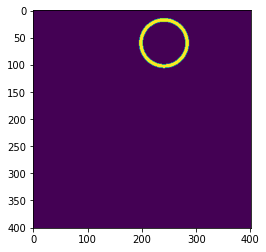

In [10]:
## Option 1: two circles

# widths of gaussians (a.u.)
width1 = 100
width2 = 85

# center coordinate (fraction of width,height)
cent = [.6, .15]

# define grid relative to center point
n = 401
[X, Y
 ] = np.meshgrid(range(n) - np.dot(cent[0], n),
                 range(n) - np.dot(cent[1], n))

img1 = np.zeros((n, n))
img2 = np.zeros((n, n))

# create Gaussians and threshold
gaus1 = np.exp(-(X**2 + Y**2) / (2 * width1**2))
gaus2 = np.exp(-(X**2 + Y**2) / (2 * width2**2))
for i in range(n):
  for j in range(n):
    if gaus1[i, j] < .9:
      img1[i, j] = 1

    if gaus2[i, j] < .9:
      img2[i, j] = 1

# plot
plt.imshow(img2 - img1)
plt.show()

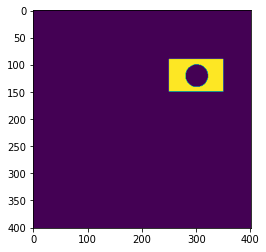

In [12]:
## Option 2: circle in a square (or square in a circle)

# center coordinate (fraction of width,height)
cent = [.75, .3]

# width of Gaussian (a.u.)
width = 45

# size of rectangle (fraction of width,height)
rsize = [.25, .15]

# define grid relative to center point
n = 401
[X, Y] = np.meshgrid(
    range(0, n) - np.dot(cent[0], n),
    range(0, n) - np.dot(cent[1], n))

circ = np.zeros((n, n))

# % create Gaussian
gaus1 = np.exp(-(X**2 + Y**2) / (2 * width**2))
for i in range(n):
  for j in range(n):
    if gaus1[i, j] < .9:
      circ[i, j] = 1

# initialize empty image
img = np.ones((n, n))

# define x- and y-values to toggle
xvals = np.arange(int(np.dot(n, cent[0] - rsize[0] / 2)),
                  int(np.dot(n, cent[0] + rsize[0] / 2)))
yvals = np.arange(int(np.dot(n, cent[1] - rsize[1] / 2)),
                  int(np.dot(n, cent[1] + rsize[1] / 2)))

# flip the switch
for i in range(0, len(xvals)):
  for j in range(0, len(yvals)):
    img[yvals[j], xvals[i]] = 0

# plot
plt.imshow(np.logical_xor(circ, img))
plt.show()